# Unit 4 -- Performance and Portfolio Analysis

|        Time | Subject                                                      |
|:------------|--------------------------------------------------------------|
| 08:30-08:45 | Unit 1 -- Welcome and Intro                                  |
| 08:45-09:30 | Unit 2 -- Financial Ecosystem: `quantmod`, `xts`, Plotting   |
| 09:45-10:30 | Unit 3 -- Volatility Modeling: `rugarch` and `rmgarch`       |
| 10:45-11:30 | **Unit 4 -- Performance and Portfolio Analysis**             |
| 11:45-12:30 | Unit 5 -- Bayesian Modeling: `Stan`                          |

## Performance Analytics via `PerformanceAnalytics`

*Ex Post* analysis of returns series

Optimized for small sample sizes of non-normal returns

More at <http://past.rinfinance.com/RinFinance2009/presentations/PA%20Workshop%20Chi%20RFinance%202009-04.pdf>

In [49]:
library(PerformanceAnalytics)
data(edhec)
head(edhec)

           Convertible Arbitrage CTA Global Distressed Securities
1997-01-31                0.0119     0.0393                0.0178
1997-02-28                0.0123     0.0298                0.0122
1997-03-31                0.0078    -0.0021               -0.0012
1997-04-30                0.0086    -0.0170                0.0030
1997-05-31                0.0156    -0.0015                0.0233
1997-06-30                0.0212     0.0085                0.0217
           Emerging Markets Equity Market Neutral Event Driven
1997-01-31           0.0791                0.0189       0.0213
1997-02-28           0.0525                0.0101       0.0084
1997-03-31          -0.0120                0.0016      -0.0023
1997-04-30           0.0119                0.0119      -0.0005
1997-05-31           0.0315                0.0189       0.0346
1997-06-30           0.0581                0.0165       0.0258
           Fixed Income Arbitrage Global Macro Long/Short Equity
1997-01-31                 0.019

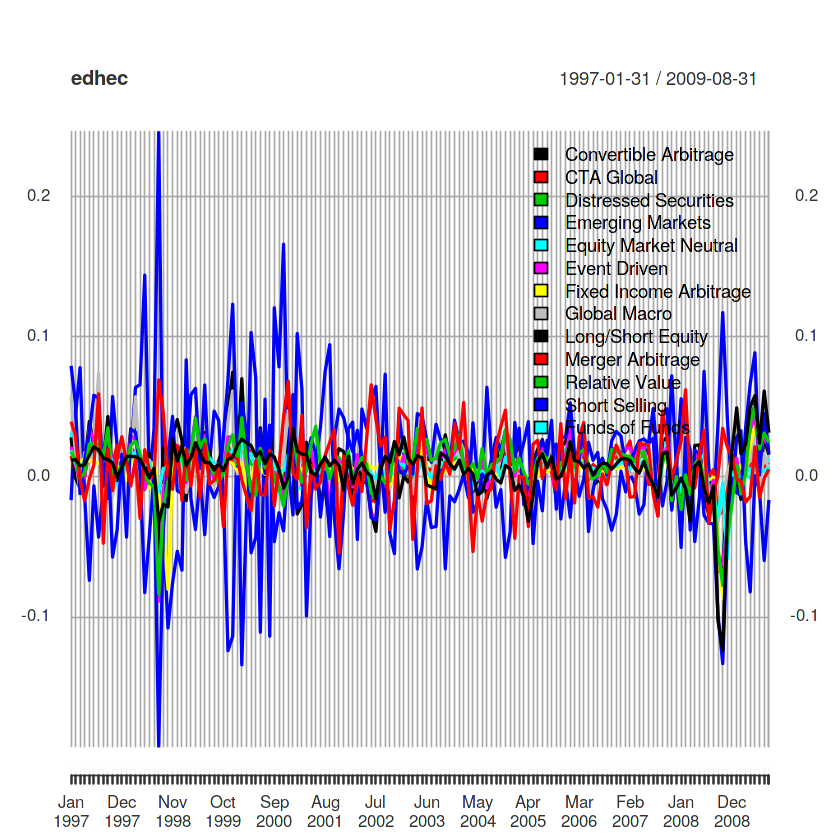

In [50]:
plot(edhec, legend.loc="topright")

In [51]:
## A bit of trickery to list function mames
pa_funcs <- ls(pos=which(grepl("PerformanceAnalytics", search()))); pa_funcs[grep("chart", pa_funcs)]

[1] "chart.ACF"                       "chart.ACFplus"                  
 [3] "chart.Bar"                       "chart.BarVaR"                   
 [5] "chart.Boxplot"                   "chart.CaptureRatios"            
 [7] "chart.Correlation"               "chart.CumReturns"               
 [9] "chart.Drawdown"                  "chart.ECDF"                     
[11] "chart.Events"                    "chart.Histogram"                
[13] "chart.QQPlot"                    "chart.Regression"               
[15] "chart.RelativePerformance"       "chart.RiskReturnScatter"        
[17] "chart.RollingCorrelation"        "chart.RollingMean"              
[19] "chart.RollingPerformance"        "chart.RollingQuantileRegression"
[21] "chart.RollingRegression"         "chart.Scatter"                  
[23] "chart.SnailTrail"                "chart.StackedBar"               
[25] "chart.TimeSeries"                "chart.VaRSensitivity"           
[27] "charts.Bar"                      "charts.BarVaR"                  
[29] "charts.PerformanceSummary"       "charts.RollingPerformance"      
[31] "charts.RollingRegression"        "charts.TimeSeries"

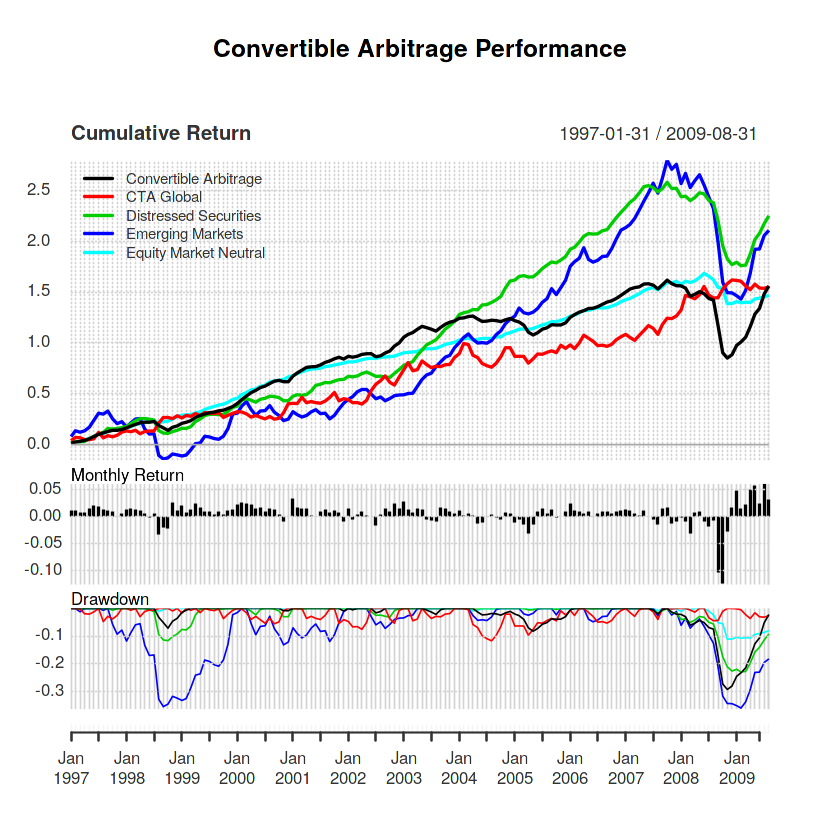

In [52]:
charts.PerformanceSummary(edhec[,1:5])

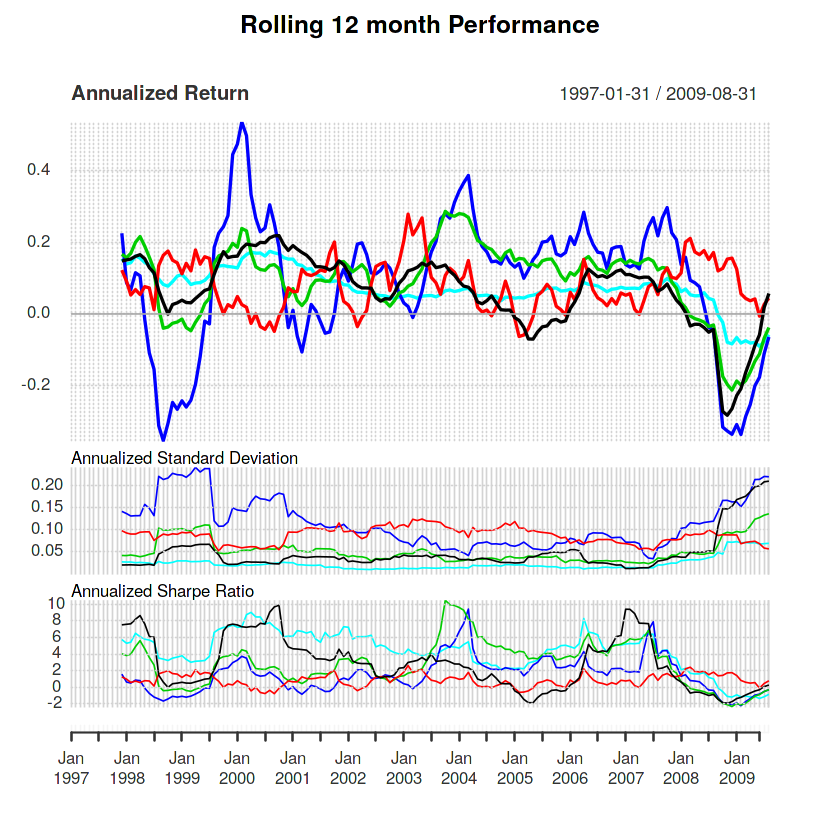

In [53]:
charts.RollingPerformance(edhec[,1:5])

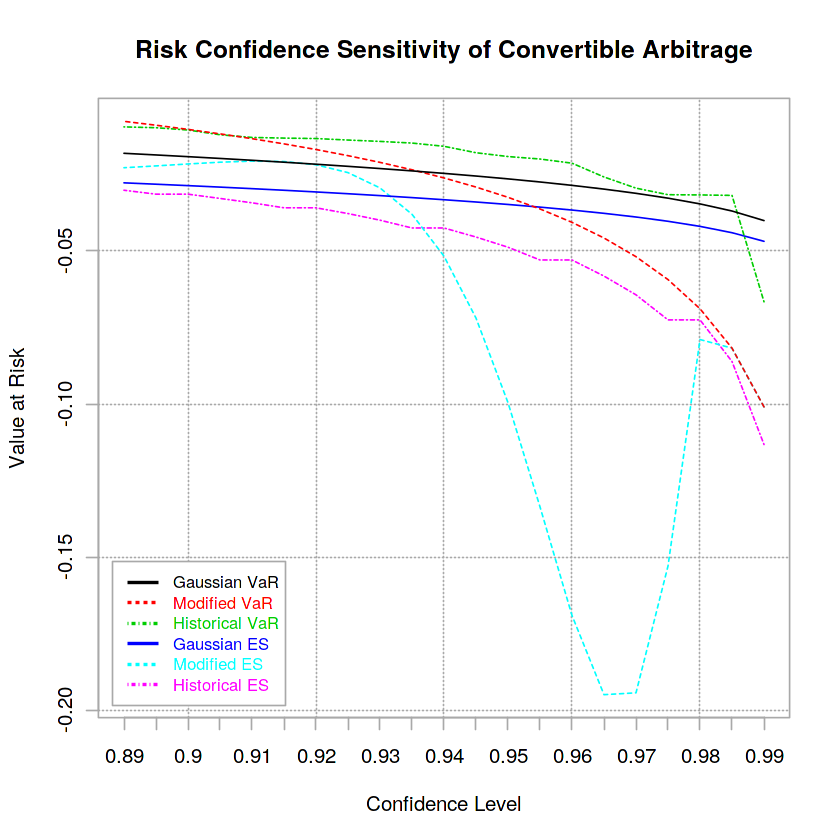

In [54]:
chart.VaRSensitivity(edhec[,1])

### Many different measures of return performance

My most commonly used -- *Component* ES (CVaR)

What fraction of ES is due to each component (approximately)

Euler's homogeneous function theorem: http://mathworld.wolfram.com/EulersHomogeneousFunctionTheorem.html

$$ \text{Risk}(w) = \sum_i w_i \frac{\partial \text{Risk}}{\partial w_i}$$

Coupled with *modified* expected shortfall: <https://faculty.washington.edu/ezivot/econ589/v11n2a4.pdf>

In [55]:
table.DownsideRisk(edhec[,1])

,Convertible Arbitrage
Semi Deviation,0.0167
Gain Deviation,0.0104
Loss Deviation,0.0256
Downside Deviation (MAR=10%),0.0174
Downside Deviation (Rf=0%),0.0147
Downside Deviation (0%),0.0147
Maximum Drawdown,0.2927
Historical VaR (95%),-0.0192
Historical ES (95%),-0.0488
Modified VaR (95%),-0.0325


In [56]:
SharpeRatio(edhec)

,Convertible Arbitrage,CTA Global,Distressed Securities,Emerging Markets,Equity Market Neutral,Event Driven,Fixed Income Arbitrage,Global Macro,Long/Short Equity,Merger Arbitrage,Relative Value,Short Selling,Funds of Funds
"StdDev Sharpe (Rf=0%, p=95%):",0.31967021,0.2582269,0.4334711,0.2137865,0.6665282,0.4153772,0.29855572,0.4507954,0.3499564,0.6075128,0.5078801,0.07552172,0.3249744
"VaR Sharpe (Rf=0%, p=95%):",0.19734443,0.1919833,0.2892904,0.1295921,0.5290353,0.2710161,0.17143740,0.4955521,0.2554694,0.4563192,0.3478610,0.05599415,0.2364671
"ES Sharpe (Rf=0%, p=95%):",0.06437672,0.1514751,0.1306556,0.0644792,0.1399201,0.1289815,0.07108602,0.3868471,0.1647833,0.2039721,0.1370940,0.04611866,0.1281444


In [57]:
ES(edhec[,1:5], weights=rep(0.2, 5), portfolio_method="component")

$MES
[1] 0.04300203

$contribution
Convertible Arbitrage            CTA Global Distressed Securities 
          0.017567710          -0.009450089           0.011655818 
     Emerging Markets Equity Market Neutral 
          0.021076543           0.002152046 

$pct_contrib_MES
Convertible Arbitrage            CTA Global Distressed Securities 
           0.40853213           -0.21975914            0.27105275 
     Emerging Markets Equity Market Neutral 
           0.49012904            0.05004522

In [58]:
## Classical Analysis
data(managers)
table.CAPM(Ra=managers[,1:6,drop=FALSE],
           Rb=managers[,c("SP500 TR","EDHEC LS EQ"),drop=FALSE],
           scale=12, 
           Rf=managers[,"US 3m TR",drop=FALSE])

,HAM1 to SP500 TR,HAM1 to EDHEC LS EQ,HAM2 to SP500 TR,HAM2 to EDHEC LS EQ,HAM3 to SP500 TR,HAM3 to EDHEC LS EQ,HAM4 to SP500 TR,HAM4 to EDHEC LS EQ,HAM5 to SP500 TR,HAM5 to EDHEC LS EQ,HAM6 to SP500 TR,HAM6 to EDHEC LS EQ
Alpha,0.0058,0.0031,0.0091,0.0017,0.0062,-0.0016,0.0040,-0.0034,0.0017,-0.0023,0.0078,0.0042
Beta,0.3901,0.7624,0.3384,1.2298,0.5523,1.4335,0.6914,1.6785,0.3208,1.1705,0.3235,1.0129
Beta+,0.3005,0.2413,0.5227,2.1379,0.4858,1.8697,0.2688,0.3266,0.1403,1.8565,0.2092,0.8960
Beta-,0.4264,1.2010,0.0698,-0.2208,0.5067,0.9442,0.8225,2.5045,0.2424,0.8649,0.0986,0.4833
R-squared,0.4339,0.3459,0.1673,0.4853,0.4341,0.6409,0.3148,0.3852,0.0829,0.2009,0.2601,0.5293
Annualized Alpha,0.0715,0.0383,0.1147,0.0210,0.0772,-0.0186,0.0494,-0.0401,0.0210,-0.0267,0.0982,0.0517
Correlation,0.6587,0.5881,0.4090,0.6966,0.6589,0.8006,0.5611,0.6207,0.2879,0.4483,0.5100,0.7275
Correlation p-value,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0111,0.0000,0.0000,0.0000
Tracking Error,0.1132,0.0758,0.1534,0.0907,0.1159,0.0816,0.1597,0.1569,0.1800,0.1422,0.1128,0.0565
Active Premium,0.0408,0.0197,0.0776,0.0378,0.0545,0.0104,0.0247,-0.0046,0.0218,-0.0324,0.0759,0.0546


In [59]:
## Shiny new toys: Shrinkage Estimators of Higher Co-Moments
?M3.struct

In [60]:
M3.struct(edhec, "CC")

-2.140920e-05,-4.560483e-06,-4.395744e-06,-1.799865e-05,-1.557166e-06,-4.320393e-06,-4.049536e-06,-2.687582e-06,-4.306171e-06,-1.571964e-06,⋯,-1.497232e-06,-4.087612e-07,-7.261542e-07,-6.544254e-07,-6.071532e-07,-7.770566e-07,-4.393571e-07,-5.478706e-07,-1.995400e-06,-3.537985e-06
-4.560483e-06,-4.560483e-06,-8.962289e-07,-1.835692e-06,-5.040338e-07,-8.909778e-07,-8.074213e-07,-7.418111e-07,-9.486599e-07,-5.389601e-07,⋯,-1.367817e-06,-3.776282e-07,-6.643706e-07,-6.052618e-07,-5.508780e-07,-7.039555e-07,-4.017951e-07,-5.030471e-07,-1.812753e-06,-4.435129e-06
-4.395744e-06,-8.962289e-07,-4.395744e-06,-1.609364e-06,-4.381172e-07,-7.802441e-07,-7.012206e-07,-6.537615e-07,-8.370305e-07,-4.721380e-07,⋯,-1.210244e-06,-3.317304e-07,-5.872744e-07,-5.313132e-07,-4.895813e-07,-6.262449e-07,-3.552718e-07,-4.436514e-07,-1.609725e-06,-3.238059e-06
-1.799865e-05,-1.835692e-06,-1.609364e-06,-1.799865e-05,-8.994862e-07,-1.600405e-06,-1.439813e-06,-1.339908e-06,-1.715277e-06,-9.683887e-07,⋯,-6.807129e-06,-6.801668e-07,-1.203192e-06,-1.089481e-06,-1.002374e-06,-1.282024e-06,-7.278452e-07,-9.091997e-07,-3.296102e-06,-6.807129e-06
-1.557166e-06,-5.040338e-07,-4.381172e-07,-8.994862e-07,-1.557166e-06,-4.357855e-07,-3.896631e-07,-3.665486e-07,-4.696309e-07,-2.637555e-07,⋯,-6.801668e-07,-1.589357e-06,-3.298649e-07,-2.971842e-07,-2.758758e-07,-3.530919e-07,-1.995863e-07,-2.488506e-07,-9.066275e-07,-1.589357e-06
-4.320393e-06,-8.909778e-07,-7.802441e-07,-1.600405e-06,-4.357855e-07,-4.320393e-06,-6.975060e-07,-6.500252e-07,-8.322193e-07,-4.695202e-07,⋯,-1.203192e-06,-3.298649e-07,-3.238512e-06,-5.283362e-07,-4.866677e-07,-6.225006e-07,-3.532084e-07,-4.411070e-07,-1.600182e-06,-3.238512e-06
-4.049536e-06,-8.074213e-07,-7.012206e-07,-1.439813e-06,-3.896631e-07,-6.975060e-07,-4.049536e-06,-5.869628e-07,-7.520949e-07,-4.221704e-07,⋯,-1.089481e-06,-2.971842e-07,-5.283362e-07,-2.500966e-06,-4.420354e-07,-5.657987e-07,-3.196790e-07,-3.985109e-07,-1.452602e-06,-2.500966e-06
-2.687582e-06,-7.418111e-07,-6.537615e-07,-1.339908e-06,-3.665486e-07,-6.500252e-07,-5.869628e-07,-2.687582e-06,-6.943621e-07,-3.932639e-07,⋯,-1.002374e-06,-2.758758e-07,-4.866677e-07,-4.420354e-07,-3.003642e-06,-5.170944e-07,-2.943616e-07,-3.681277e-07,-1.330520e-06,-3.003642e-06
-4.306171e-06,-9.486599e-07,-8.370305e-07,-1.715277e-06,-4.696309e-07,-8.322193e-07,-7.520949e-07,-6.943621e-07,-4.306171e-06,-5.034739e-07,⋯,-1.282024e-06,-3.530919e-07,-6.225006e-07,-5.657987e-07,-5.170944e-07,-3.913260e-06,-3.765096e-07,-4.709817e-07,-1.701113e-06,-3.913260e-06
-1.571964e-06,-5.389601e-07,-4.721380e-07,-9.683887e-07,-2.637555e-07,-4.695202e-07,-4.221704e-07,-3.932639e-07,-5.034739e-07,-1.571964e-06,⋯,-7.278452e-07,-1.995863e-07,-3.532084e-07,-3.196790e-07,-2.943616e-07,-3.765096e-07,-1.970989e-06,-2.668633e-07,-9.678952e-07,-1.970989e-06
-2.580735e-06,-6.734511e-07,-5.881440e-07,-1.206789e-06,-3.279471e-07,-5.849346e-07,-5.247960e-07,-4.907477e-07,-6.284669e-07,-3.539778e-07,⋯,-9.091997e-07,-2.488506e-07,-4.411070e-07,-3.985109e-07,-3.681277e-07,-4.709817e-07,-2.668633e-07,-2.328612e-06,-1.210191e-06,-2.328612e-06


## Portfolio Optimization: `PortfolioAnalytics`

A *modern* take on "Modern Portfolio Theory"

Flexible portfolio optimization framework -- deeply integrated with *PerformanceAnalytics*

Can use various exact (convex) optimizers or approximate global optimizers: for many interesting constraints, the underlying problem is nonconvex, so global optimizers are more useful. (Though see <http://past.rinfinance.com/agenda/2017/talk/MichaelWeylandt.pdf>)

See more at <http://rossb34.github.io/PortfolioAnalyticsPresentation2016/#1>

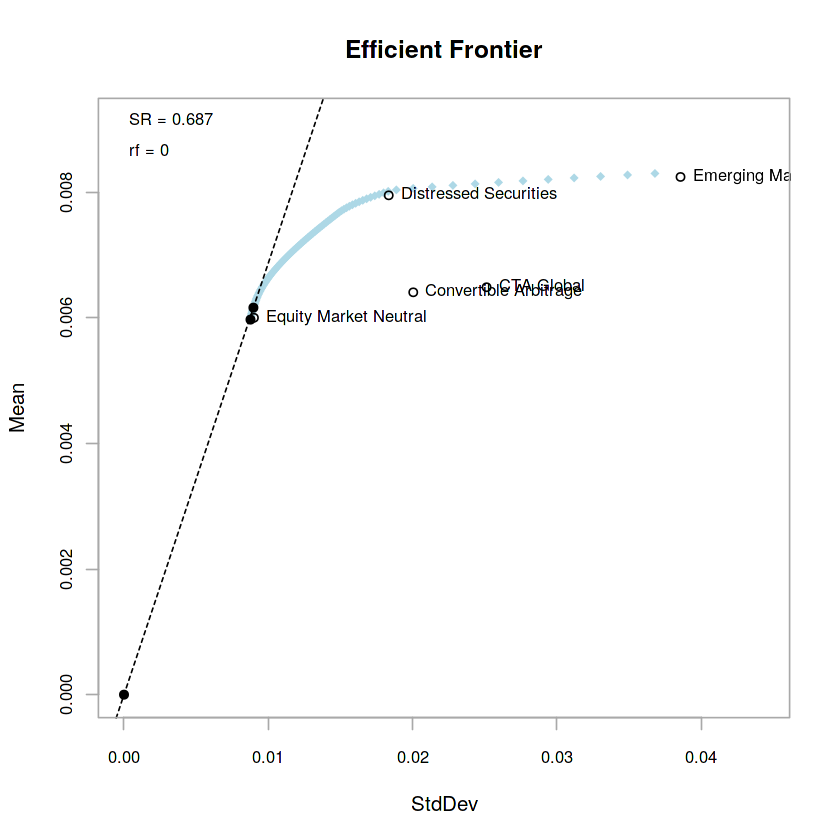

In [61]:
library(PortfolioAnalytics)
edhec5 <- edhec[,1:5]
portf.base <- portfolio.spec(colnames(edhec5))
portf.base <- add.constraint(portf.base, type="weight_sum",
                             min_sum=0.99, max_sum=1.01)
portf.base <- add.constraint(portf.base, type="box", min=0, max=1)
ef <- create.EfficientFrontier(edhec5, portfolio=portf.base,
                               type="mean-StdDev", n.portfolios=100)
chart.EfficientFrontier(ef, match.col="StdDev", pch=18, col="lightblue")

In [62]:
library(PortfolioAnalytics)

## Take 5 assets to keep things simple
funds <- edhec[,1:5]
fund_names <- colnames(funds)

## We first create a portfolio
port_spec <- portfolio.spec(assets=fund_names)

port_spec

**************************************************
PortfolioAnalytics Portfolio Specification 
**************************************************

Call:
portfolio.spec(assets = fund_names)

Number of assets: 5 
Asset Names
[1] "Convertible Arbitrage" "CTA Global"            "Distressed Securities"
[4] "Emerging Markets"      "Equity Market Neutral"


In [63]:
## Next we add some constraints:

## A slightly loose full-investment constraint
port_spec <- add.constraint(port_spec, type="weight_sum", min_sum=0.95, max_sum=1)

## Long only
port_spec <- add.constraint(port_spec, type="long_only")

## And a minimum return constraint
port_spec <- add.constraint(port_spec, type="return", return_target=0.01)

port_spec

**************************************************
PortfolioAnalytics Portfolio Specification 
**************************************************

Call:
portfolio.spec(assets = fund_names)

Number of assets: 5 
Asset Names
[1] "Convertible Arbitrage" "CTA Global"            "Distressed Securities"
[4] "Emerging Markets"      "Equity Market Neutral"

Constraints
Enabled constraint types
		- weight_sum 
		- long_only 
		- return 


In [64]:
## Now we want to minimize the risk (standard-deviation) subject to that constraint
port_spec <- add.objective(portfolio=port_spec, type="risk", name="var")
port_spec

**************************************************
PortfolioAnalytics Portfolio Specification 
**************************************************

Call:
portfolio.spec(assets = fund_names)

Number of assets: 5 
Asset Names
[1] "Convertible Arbitrage" "CTA Global"            "Distressed Securities"
[4] "Emerging Markets"      "Equity Market Neutral"

Constraints
Enabled constraint types
		- weight_sum 
		- long_only 
		- return 

Objectives:
Enabled objective names
		- var 


In [65]:
## Finally, we run the optimizer
optimal_port <- optimize.portfolio(R=funds, portfolio=port_spec, optimize_method="DEoptim")

optimal_port

Iteration: 1 bestvalit: 20.407803 bestmemit:    0.000000    0.004000    0.626000    0.328000    0.042000
Iteration: 2 bestvalit: 19.779725 bestmemit:    0.072000    0.000000    0.004000    0.912000    0.002000
Iteration: 3 bestvalit: 19.779725 bestmemit:    0.072000    0.000000    0.004000    0.912000    0.002000
Iteration: 4 bestvalit: 19.333487 bestmemit:    0.042000    0.002000    0.100000    0.848000    0.000000
Iteration: 5 bestvalit: 19.333487 bestmemit:    0.042000    0.002000    0.100000    0.848000    0.000000
Iteration: 6 bestvalit: 19.333487 bestmemit:    0.042000    0.002000    0.100000    0.848000    0.000000
Iteration: 7 bestvalit: 19.333487 bestmemit:    0.042000    0.002000    0.100000    0.848000    0.000000
Iteration: 8 bestvalit: 19.333487 bestmemit:    0.042000    0.002000    0.100000    0.848000    0.000000
Iteration: 9 bestvalit: 19.333487 bestmemit:    0.042000    0.002000    0.100000    0.848000    0.000000
Iteration: 10 bestvalit: 19.333487 bestmemit:    0.0420

***********************************
PortfolioAnalytics Optimization
***********************************

Call:
optimize.portfolio(R = funds, portfolio = port_spec, optimize_method = "DEoptim")

Optimal Weights:
Convertible Arbitrage            CTA Global Distressed Securities 
                0.000                 0.002                 0.088 
     Emerging Markets Equity Market Neutral 
                0.910                 0.000 

Objective Measures:
 StdDev 
0.03641 




In [66]:
## If we are interested in the entire mean-variance _frontier_ we can supplement 
## the mean constraint with an objective
port_spec2 <- portfolio.spec(assets=fund_names)

port_spec2 <- add.constraint(port_spec2, type="weight_sum", min_sum=0.95, max_sum=1)
port_spec2 <- add.constraint(port_spec2, type="long_only")
port_spec2 <- add.constraint(port_spec2, type="return", return_target=0.007)

## And risk & return objectives
port_spec2 <- add.objective(portfolio=port_spec2, type="risk", name="var")
port_spec2 <- add.objective(port_spec2, type="return", name="mean", multiplier=0)

op2 <- optimize.portfolio(R=funds, portfolio=port_spec2, optimize_method="DEoptim", trace=TRUE, search_size = 4000)
op2

Iteration: 1 bestvalit: 0.215609 bestmemit:    0.200000    0.200000    0.200000    0.200000    0.200000
Iteration: 2 bestvalit: 0.215609 bestmemit:    0.200000    0.200000    0.200000    0.200000    0.200000
Iteration: 3 bestvalit: 0.215609 bestmemit:    0.200000    0.200000    0.200000    0.200000    0.200000
Iteration: 4 bestvalit: 0.215609 bestmemit:    0.200000    0.200000    0.200000    0.200000    0.200000
Iteration: 5 bestvalit: 0.013563 bestmemit:    0.000000    0.002000    0.560000    0.000000    0.422000
Iteration: 6 bestvalit: 0.013563 bestmemit:    0.000000    0.002000    0.560000    0.000000    0.422000
Iteration: 7 bestvalit: 0.013563 bestmemit:    0.000000    0.002000    0.560000    0.000000    0.422000
Iteration: 8 bestvalit: 0.013563 bestmemit:    0.000000    0.002000    0.560000    0.000000    0.422000
Iteration: 9 bestvalit: 0.013563 bestmemit:    0.000000    0.002000    0.560000    0.000000    0.422000
Iteration: 10 bestvalit: 0.013563 bestmemit:    0.000000    0.00

***********************************
PortfolioAnalytics Optimization
***********************************

Call:
optimize.portfolio(R = funds, portfolio = port_spec2, optimize_method = "DEoptim", 
    search_size = 4000, trace = TRUE)

Optimal Weights:
Convertible Arbitrage            CTA Global Distressed Securities 
                0.000                 0.002                 0.560 
     Emerging Markets Equity Market Neutral 
                0.000                 0.422 

Objective Measures:
 StdDev 
0.01288 


 mean 
0.007 




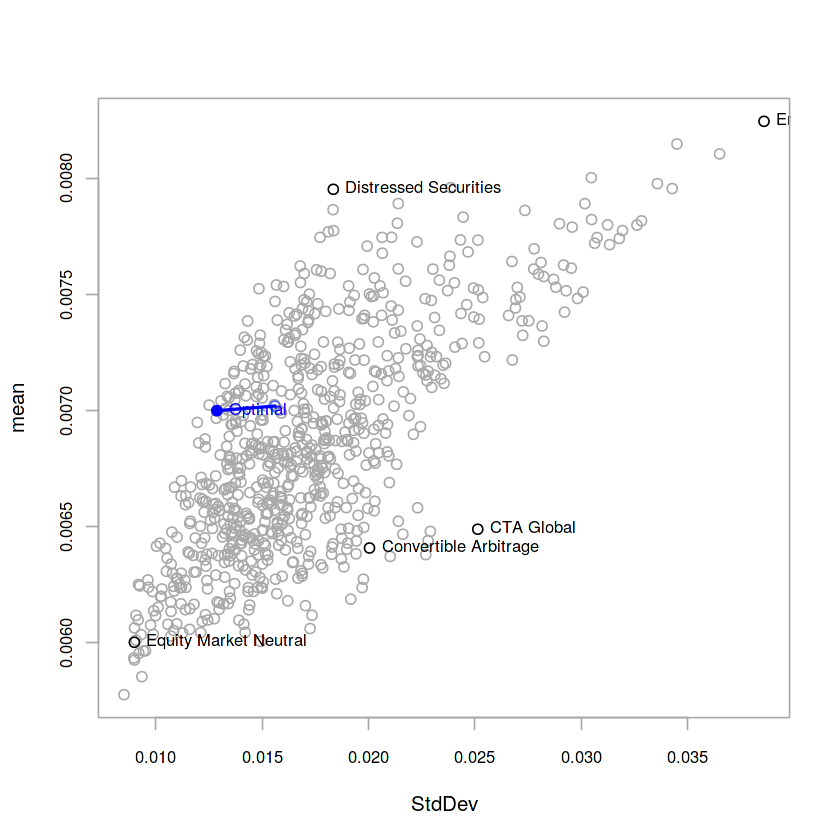

In [67]:
chart.RiskReward(op2, risk.col="StdDev", chart.assets=TRUE)

### Feasible Space Analysis

Widely useful but surprisingly overlooked tool: feasible space analysis

Most managers do not manage in a vaccum -- they have investment and style constraints they are legally bound to

How to tell what is true skill vs a style which has worked well? 

Generate a large number of random portfolios which satisfy the constraints of the mandate in question -- see how well the manager performs relative to that universe

In [68]:
p <- portfolio.spec(colnames(edhec5))

## Long only + full investment constraint
## Make the "full investment" a bit loose to speed up exploring the sample space
p <- add.constraint(p, type="weight_sum", min_sum=0.99, max_sum=1.01)
p <- add.constraint(p, type="box", min=0, max=1)

# This is a bit odd on first glance -- multipler = 0 => compute but don't optimize
p <- add.objective(p, type="return", name="mean", multiplier=0)
p <- add.objective(p, type="risk", name="StdDev", multiplier=0)

rp <- random_portfolios(p, permutations=5000, rp_method='sample')
opt <- optimize.portfolio(edhec5, p, optimize_method="random", rp=rp, trace=TRUE)
xt <- extractStats(opt)

In [69]:
p

**************************************************
PortfolioAnalytics Portfolio Specification 
**************************************************

Call:
portfolio.spec(assets = colnames(edhec5))

Number of assets: 5 
Asset Names
[1] "Convertible Arbitrage" "CTA Global"            "Distressed Securities"
[4] "Emerging Markets"      "Equity Market Neutral"

Constraints
Enabled constraint types
		- weight_sum 
		- box (long only) 

Objectives:
Enabled objective names
		- mean 
		- StdDev 


In [70]:
opt

***********************************
PortfolioAnalytics Optimization
***********************************

Call:
optimize.portfolio(R = edhec5, portfolio = p, optimize_method = "random", 
    trace = TRUE, rp = rp)

Optimal Weights:
Convertible Arbitrage            CTA Global Distressed Securities 
                  0.2                   0.2                   0.2 
     Emerging Markets Equity Market Neutral 
                  0.2                   0.2 

Objective Measures:
   mean 
0.00702 


 StdDev 
0.01561 




In [71]:
xt

,mean,StdDev,out,w.Convertible Arbitrage,w.CTA Global,w.Distressed Securities,w.Emerging Markets,w.Equity Market Neutral
.rnd.portf.1,0.007020000,0.01560916,0,0.200,0.200,0.200,0.200,0.200
.rnd.portf.2,0.006813522,0.01187450,0,0.096,0.234,0.246,0.058,0.374
.rnd.portf.3,0.006885275,0.01425429,0,0.354,0.266,0.288,0.048,0.034
.rnd.portf.4,0.007230601,0.01498791,0,0.312,0.202,0.442,0.036,0.018
.rnd.portf.5,0.007229924,0.01600930,0,0.128,0.326,0.308,0.180,0.060
.rnd.portf.6,0.006622155,0.01178108,0,0.232,0.242,0.136,0.042,0.356
.rnd.portf.7,0.006413888,0.01482100,0,0.626,0.288,0.008,0.022,0.048
.rnd.portf.8,0.007540696,0.01515673,0,0.026,0.152,0.736,0.024,0.056
.rnd.portf.9,0.007138903,0.02180610,0,0.468,0.050,0.044,0.362,0.080
.rnd.portf.10,0.006721104,0.01332367,0,0.330,0.006,0.292,0.000,0.374


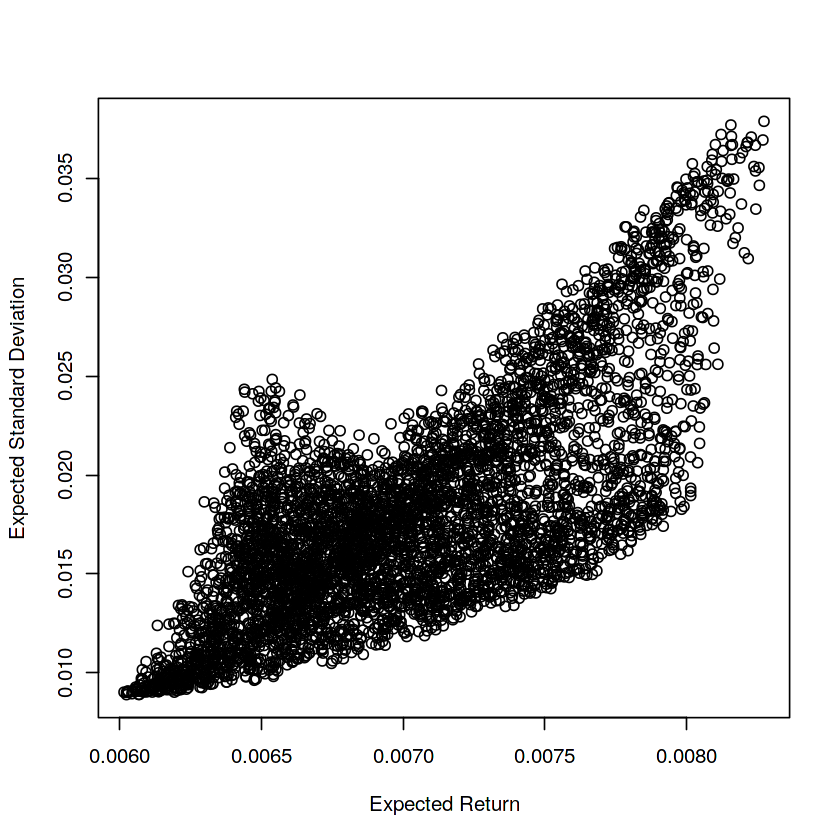

In [72]:
plot(xt[,1], xt[,2], xlab="Expected Return", ylab="Expected Standard Deviation")

In [73]:
# Let's compare to a dollar neutral fund with exposure limits at +/- 50%

p <- portfolio.spec(colnames(edhec5))
p <- add.constraint(p, type="weight_sum", min_sum=-0.01, max_sum=0.01)
p <- add.constraint(p, type="box", min=-0.5, max=0.5)
p <- add.objective(p, type="return", name="mean", multiplier=0)
p <- add.objective(p, type="risk", name="StdDev", multiplier=0)
rp <- random_portfolios(p, permutations=5000, rp_method='sample')
opt <- optimize.portfolio(edhec5, p, optimize_method="random", rp=rp, trace=TRUE)
xt2 <- extractStats(opt)

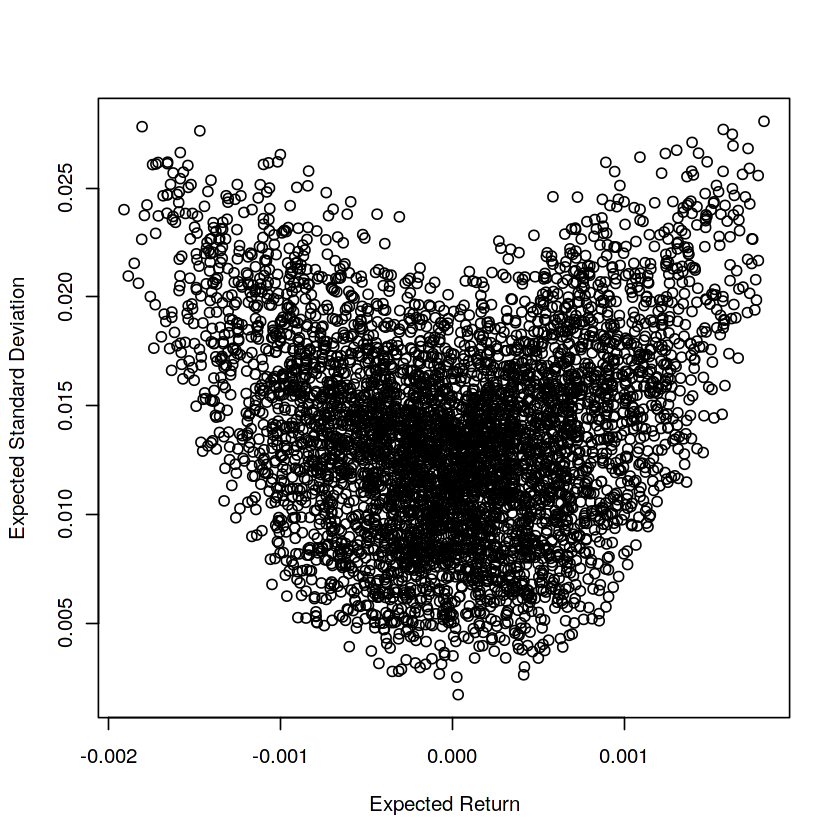

In [74]:
plot(xt2[,1], xt2[,2], xlab="Expected Return", ylab="Expected Standard Deviation")